<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/ML_with_yellB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U yellowbrick --quiet

     |████████████████████████████████| 274 kB 4.3 MB/s 


# Import and prepare data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
census = pd.read_csv('adult_census.csv')
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
census.shape

(48842, 15)

In [6]:
data = census.drop(columns=['class'], axis=1)
target = census['class']

In [8]:
census.dtypes.value_counts()

object    9
int64     6
dtype: int64

# Variables inspection

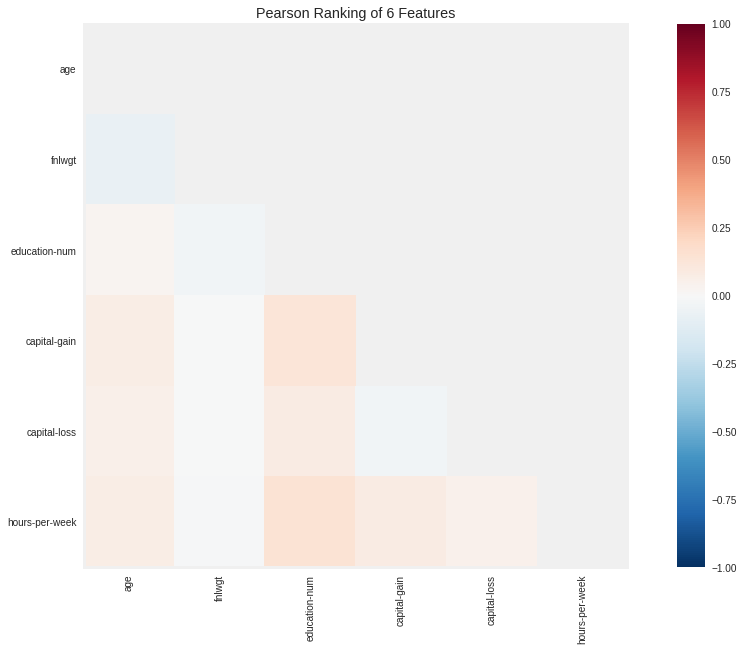

In [12]:
from yellowbrick.features import Rank2D

fig, ax = plt.subplots(figsize=(16,10))
ax = Rank2D(algorithm='pearson')
ax.fit(data.select_dtypes(include='number'))
ax.transform(data.select_dtypes(include='number'))
ax.show()

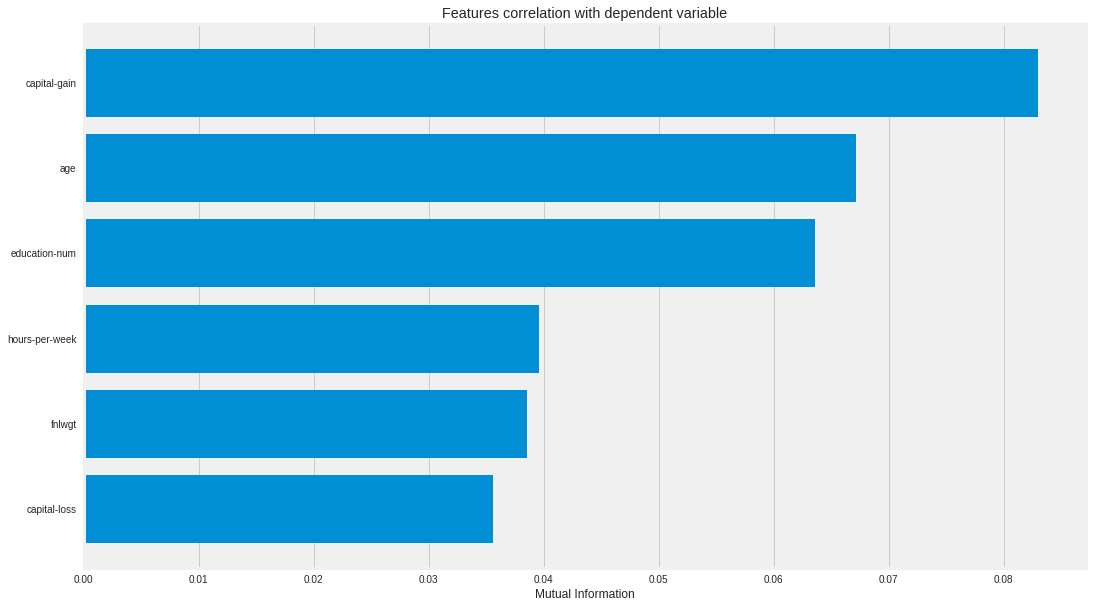

In [15]:
from yellowbrick.target import FeatureCorrelation

fig, ax = plt.subplots(figsize=(16,10))
ax = FeatureCorrelation(method='mutual_info-classification', sort=True)
ax.fit(data.select_dtypes(include='number'), target, discrete_features=False)
ax.show()

# Modelisation

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import (
    cross_validate,
    train_test_split,
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
)
from sklearn.compose import (
    ColumnTransformer,
    make_column_selector as selector,
    )
from sklearn.pipeline import Pipeline

In [20]:
num_features = selector(dtype_include='number')(data)
cat_features = selector(dtype_include='object')(data)

print(num_features)
print(cat_features)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
